Описание проекта:

Новый стартап который активно развивает приложение на мобильных телефонах. Цель построить базовую аналитику.
* Необходимо построить базовый дашборд который наглядно отображает ключевые события нашего продукта.
* Анализ продуктовых метрик.

Построим базовый дашборд которые покрывает основные аналитические запросы компании.  И отвечают на первый базовый вопрос сколько? Основной дашборд это такая штука которая нам позволяет нам сразу же посмотреть какието то супер базовые вещи которые должны быть всегда на глазах. 

In [29]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


In [30]:
df_action = pd.read_csv('df_action_sampled_step4.csv')

df_log = pd.read_csv('user_log_messenger.csv')

In [32]:
display(f'Датасет df_action несет в себе информацию о действиях пользователей.\
    Количество строк - {df_action.shape[0]}')
display(df_action.head(3))

'Датасет df_action несет в себе информацию о действиях пользователей.    Количество строк - 16739636'

,user_id,post_id,action,time
0,148500,3137,view,2024-02-10 20:43:41
1,36941,3129,view,2024-02-10 20:43:42
2,136280,3078,view,2024-02-10 20:43:42


In [33]:
display(f'Датасет df_log несет в себе информацию о пользователях. Количество строк - {df_log.shape[0]}')
display(df_log.head(3))

'Датасет df_log несет в себе информацию о пользователях. Количество строк - 159529'

,user_id,gender,age,country,city,os,source,exp_group
0,73035,1,16,Russia,Moscow,Android,ads,0
1,93014,0,21,Russia,Izhevsk,Android,ads,1
2,127345,1,45,Ukraine,Mykolaiv,Android,organic,4


# Основной дашборд

Рассчитаем DAU, WAU и MAU. Вычислим средние значения этих метрик за весь период. Отобразим изменения метрик во времени на графиках.

Важно определить, какое действие пользователь должен совершить в вашем бизнесе, чтобы быть определенным как "активный" пользователь, поскольку оно не одинаково для каждого бизнеса. Является ли активным пользователем тот, кто входит в систему? Или это тот, кто совершает более конкретное действие с вашим продуктом, например, читает статью, отправляет запрос или комментарий, скачивает документ и т.д.

Мы будем считать активным пользователем тех у коорых есть хотябы одно действий просмотр или лайк.

In [34]:
df_action['date'] = pd.to_datetime(df_action['time']).dt.date

df_action['week'] = pd.to_datetime(df_action['time']).dt.isocalendar().week

df_action['date_month'] = pd.to_datetime(df_action['time']).dt.month

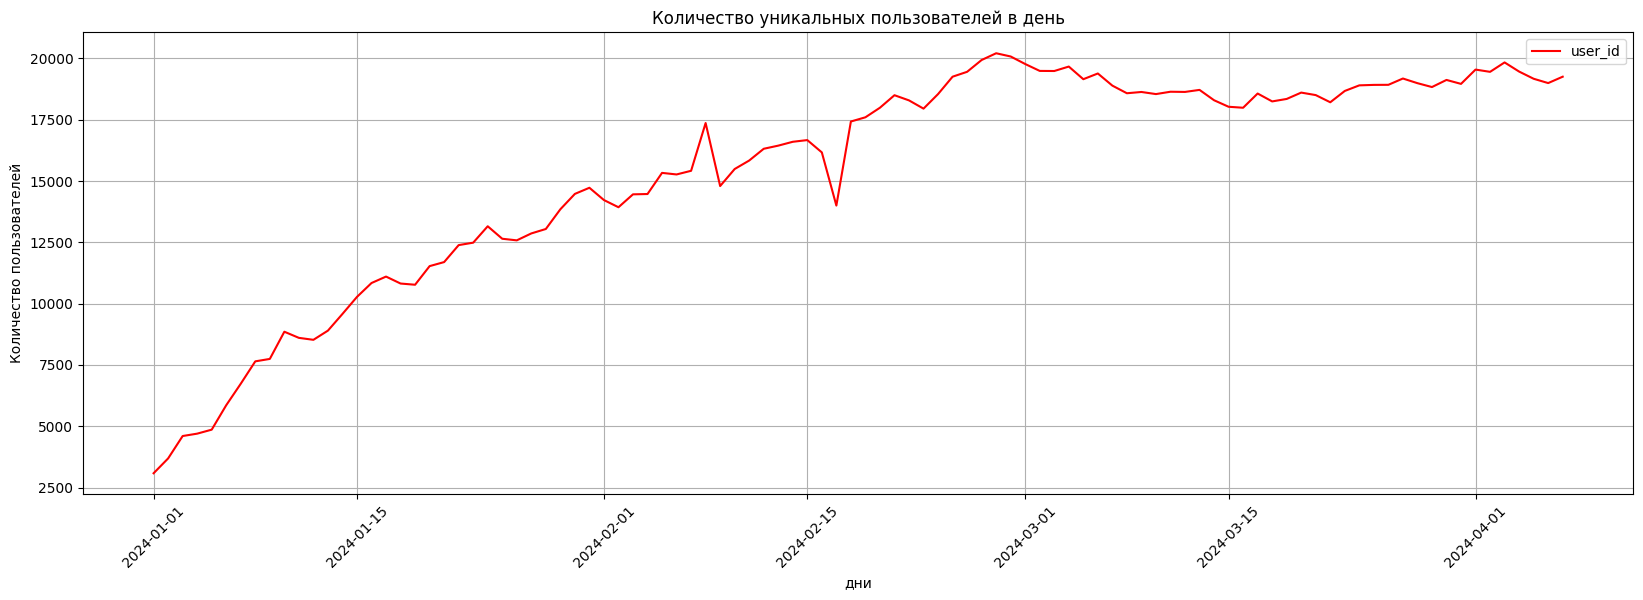

In [35]:
# построим график Количество уникальных пользователей в день
df_action.groupby('date').agg({'user_id': 'nunique'}).plot(
    color = 'red',
     figsize=(20,6), 
     title = 'Количество уникальных пользователей в день', 
     xlabel ='дни', 
     ylabel='Количество пользователей')
plt.xticks(rotation = 45) 
plt.grid(True)
plt.show()

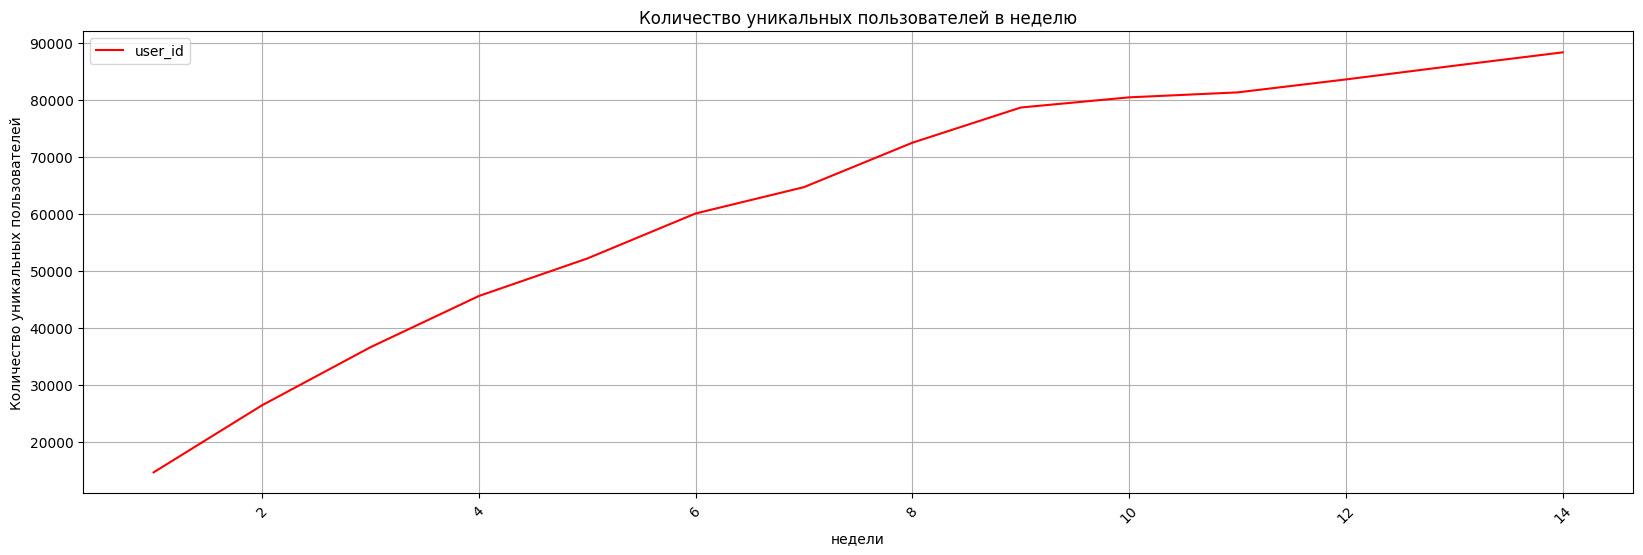

In [36]:
# построим график Количество уникальных пользователей в неделю
df_action.groupby('week').agg({'user_id': 'nunique'}).plot(
    color = 'red',
     figsize=(20,6), 
     title = 'Количество уникальных пользователей в неделю', 
     xlabel ='недели', 
     ylabel='Количество уникальных пользователей')
plt.xticks(rotation = 45) 
plt.grid(True)
plt.show()

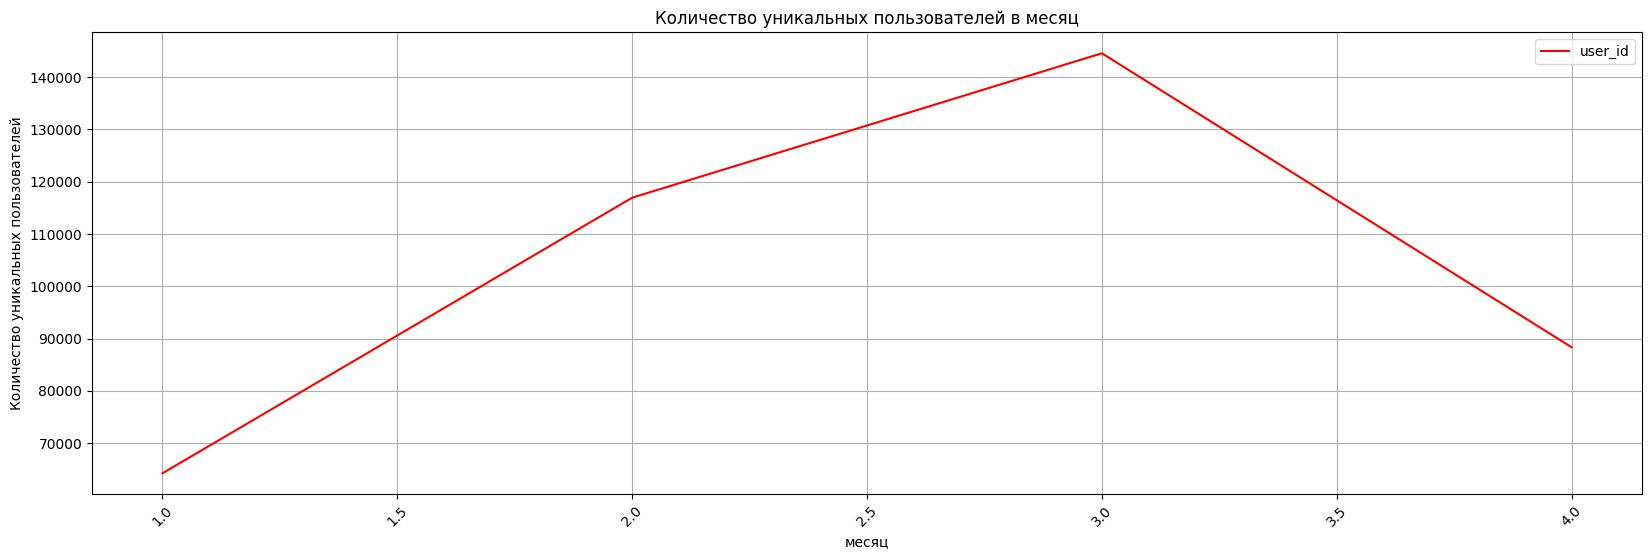

In [37]:
# построим график уникальных пользователей в месяц
df_action.groupby('date_month').agg({'user_id': 'nunique'}).plot(
    color = 'red',
     figsize=(20,6), 
     title = 'Количество уникальных пользователей в месяц', 
     xlabel ='месяц', 
     ylabel='Количество уникальных пользователей')
plt.xticks(rotation = 45) 
plt.grid(True)
plt.show()

In [38]:
# Определяем минимальную дату появления каждого пользователя
df_action['first_date'] = df_action.groupby('user_id')['date'].transform('min')

# Определяем, новый ли пользователь в конкретный день
df_action['user_status'] = np.where(df_action['date'] == df_action['first_date'], 'new_users', 'old_users')

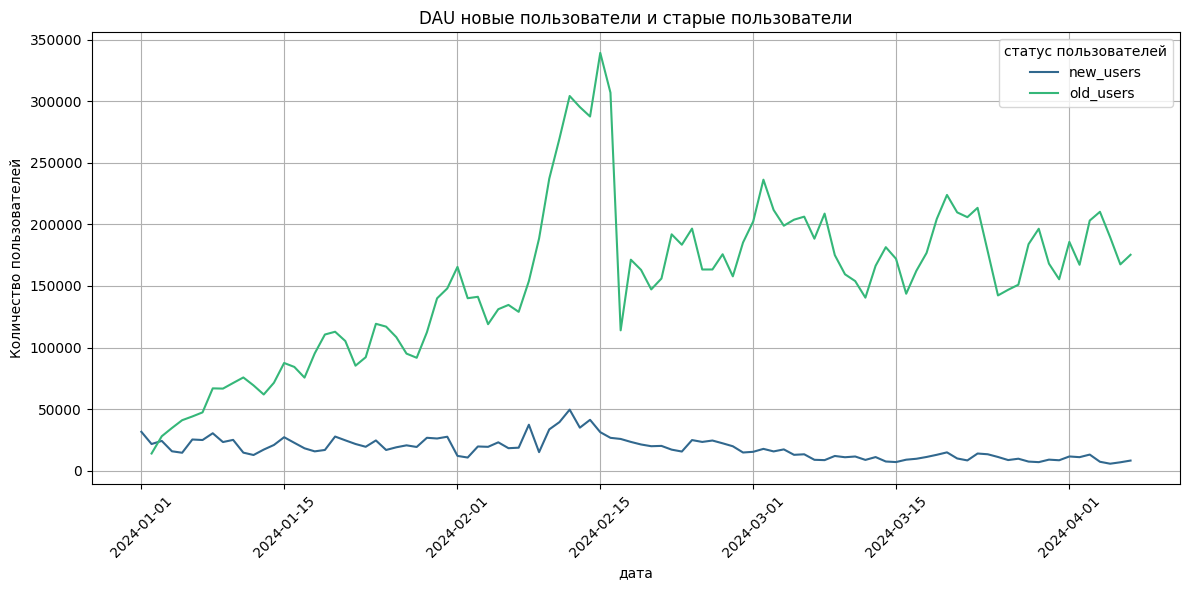

In [39]:
# построим график DAU новые пользователи и старые пользователи
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_action.groupby(['date', 'user_status']).size().reset_index(name='count'), 
             x='date', y='count', hue='user_status', style='user_status', 
             dashes=False, palette='viridis')
plt.xticks(rotation=45)  
plt.xlabel('дата')  # Подпись оси X
plt.ylabel('Количество пользователей')  # Подпись оси Y
plt.title('DAU новые пользователи и старые пользователи')  # Заголовок графика
plt.legend(title='статус пользователей')  # Добавление легенды с заголовком
plt.grid(True)  # Добавление сетки на график для улучшения читаемости
plt.tight_layout()  # Автоматическая корректировка подложки под размеры графика
plt.show()  # Показать график


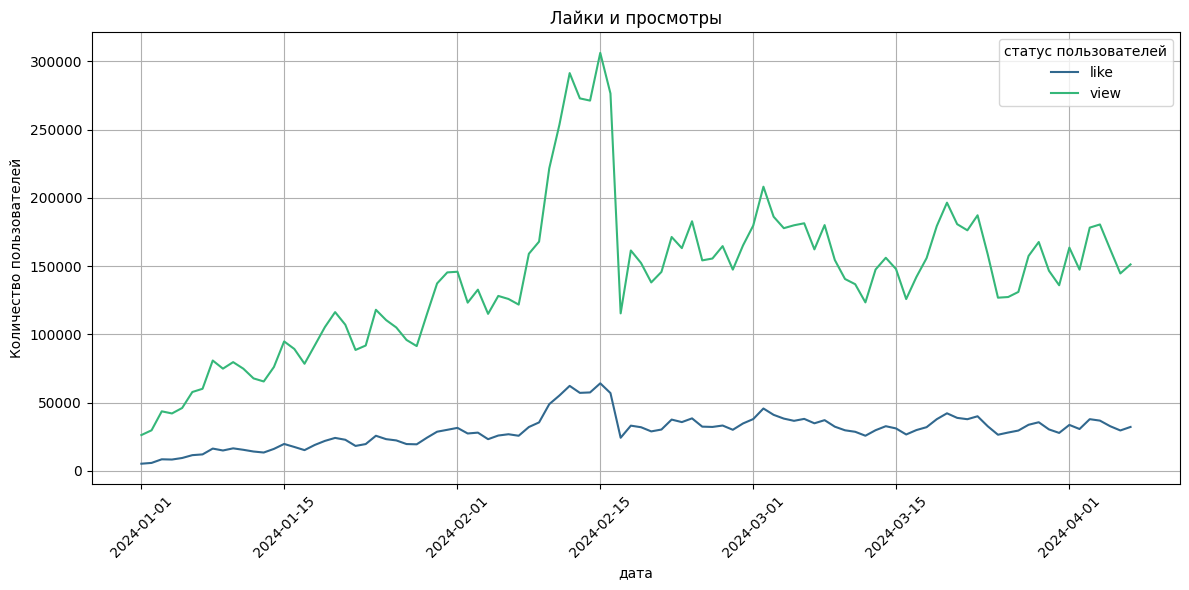

In [40]:
# построим график Лайки и просмотры
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_action.groupby(['date', 'action']).size().reset_index(name='count'), 
             x='date', y='count', hue='action', style='action', 
             dashes=False, palette='viridis')
plt.xticks(rotation=45)  
plt.xlabel('дата')  # Подпись оси X
plt.ylabel('Количество пользователей')  # Подпись оси Y
plt.title('Лайки и просмотры')  # Заголовок графика
plt.legend(title='статус пользователей')  # Добавление легенды с заголовком
plt.grid(True)  # Добавление сетки на график для улучшения читаемости
plt.tight_layout()  # Автоматическая корректировка подложки под размеры графика
plt.show()  # Показать график


In [41]:
# Группировка по user_id и action, подсчёт количества каждого действия
action_counts = df_action.groupby(['user_id', 'action']).size().unstack(fill_value=0)

# Расчёт CTR для каждого пользователя
action_counts['CTR'] = action_counts['like'] / action_counts['view']

# Объединяем CTR обратно с исходным DataFrame
df_action = df_action.merge(action_counts['CTR'], on='user_id')
df_action = df_action.sort_values('time')


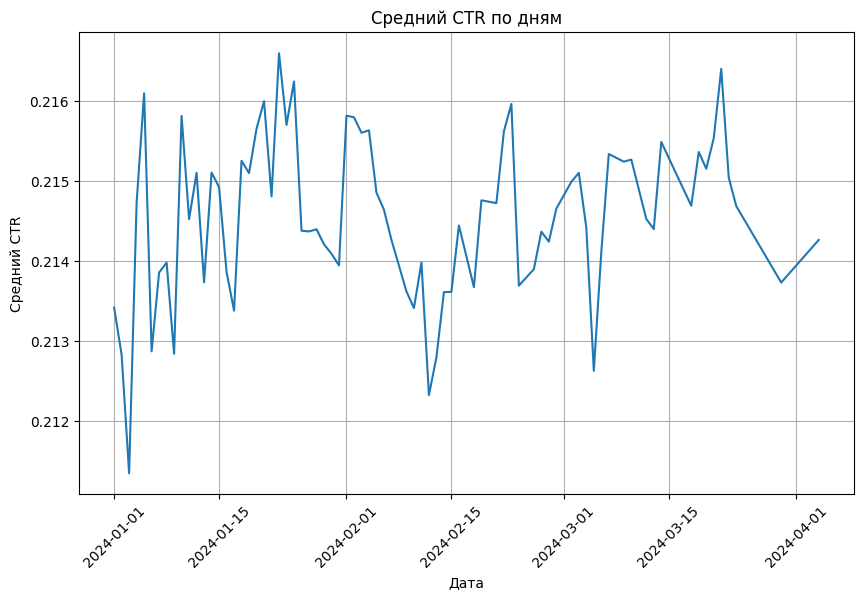

In [42]:
# Построение графика среднего CTR по дням
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_action.groupby('date')['CTR'].mean().reset_index(), 
             x='date', y='CTR')
plt.title('Средний CTR по дням')
plt.xlabel('Дата')
plt.ylabel('Средний CTR')
plt.grid(True)
plt.xticks(rotation=45)  
plt.show()


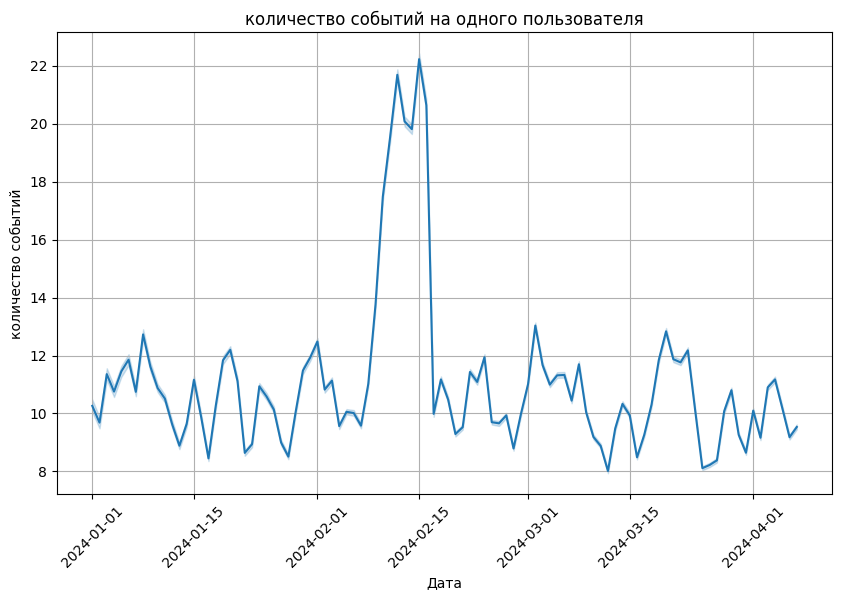

In [43]:
# Построение графика число событий на одного пользователя
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_action.groupby(['date', 'user_id'])['time'].count().reset_index(), 
             x='date', y='time')
plt.title('количество событий на одного пользователя')
plt.xlabel('Дата')
plt.ylabel('количество событий')
plt.grid(True)
plt.xticks(rotation=45)  
plt.show()


# Retention по дням
Построим график Retention по дням. Рассмотрим первые две недели февраля. 


In [44]:
df_ret = df_action.loc[:,['user_id', 'date', 'action', 'time']] \
            .query('"2024-02-01 00:00:00" <= time < "2024-02-16 00:00:00"')

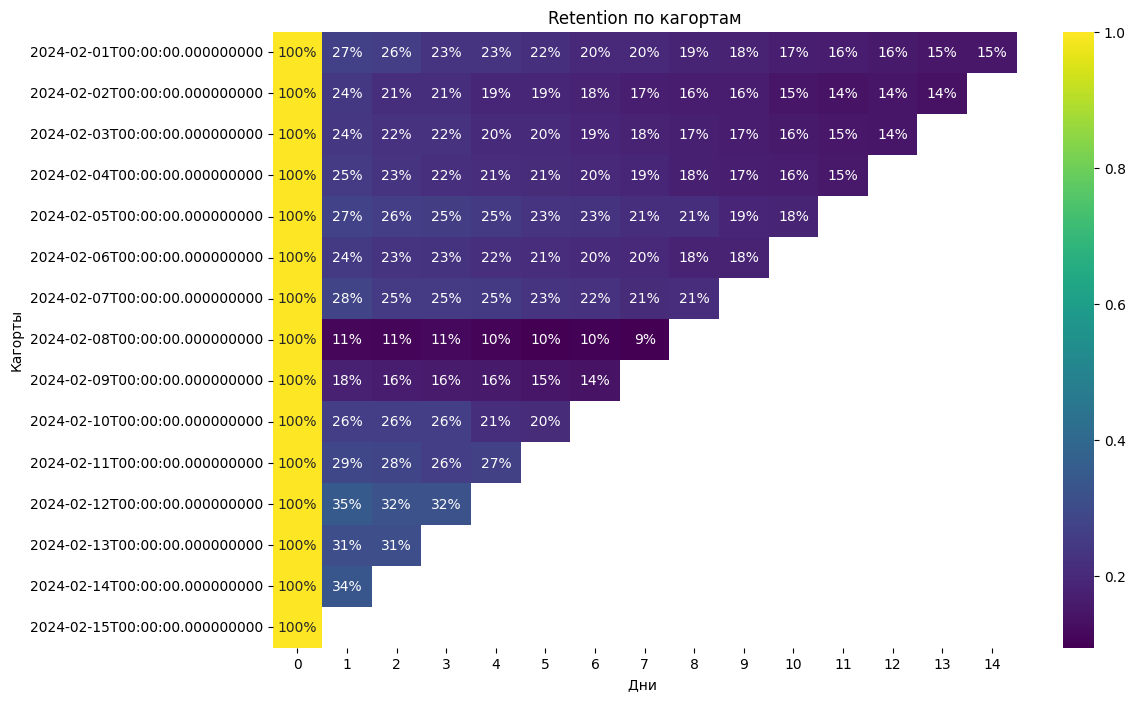

In [46]:
# Определяем дату первой активности для каждого пользователя
df_ret['cohort'] = df_ret.groupby('user_id')['date'].transform('min')

# Группируем по когорте и дате и подсчитываем уникальных активных пользователей в каждый последующий день
cohort_data = df_ret.groupby(['cohort', 'date']).agg(n_users=('user_id', 'nunique')).reset_index()


# Пример предварительной обработки данных
# Убедимся, что даты преобразованы в datetime
cohort_data['date'] = pd.to_datetime(cohort_data['date'])
cohort_data['cohort'] = pd.to_datetime(cohort_data['cohort'])


# Вычисляем день жизненного цикла для каждой записи относительно первого посещения
cohort_data['days_since_first'] = (cohort_data['date'] - cohort_data['cohort']).dt.days

# Переводим данные в формат, удобный для отображения retention:
# дни с момента первой активности на оси X и когорты на оси Y
pivot = cohort_data.pivot_table(index='cohort', columns='days_since_first', values='n_users', aggfunc='sum')

# Нормализуем данные относительно размера когорты в день 0
cohort_size = pivot.loc[:, 0] # размер каждой когорты в первый день
retention_matrix = pivot.divide(cohort_size, axis=0)

# График Retention
plt.figure(figsize=(12, 8))
sns.heatmap(retention_matrix, annot=True, fmt='.0%', cmap='viridis', cbar=True)
plt.title('Retention по кагортам')
plt.ylabel('Кагорты')
plt.xlabel('Дни ')
plt.show()

На графики видим что в течение недели нам удаеться удержать примерно 20 процентов новых пользователей, а концу второй недели остается примерно 15 процентов. 

# Построим график новых, старых и ушедших пользователей

In [ ]:
# Определение первой активности каждого пользователя
df_action['first_week'] = df_action.groupby('user_id')['week'].transform('min')

# Определение последней активности каждого пользователя
df_action['last_week'] = df_action.groupby('user_id')['week'].transform('max')

# Подсчёт количества активных пользователей по неделям
weekly_active_users = df_action.groupby('week')['user_id'].nunique().reset_index(name='active_users')

# Подсчёт новых пользователей по неделям
weekly_new_users = df_action[df_action['week'] == df_action['first_week']].groupby('week')['user_id'].nunique().reset_index(name='new_users')

# Подсчёт потерянных пользователей по неделям
def lost_users(week):
    current_week_users = set(df_action[df_action['week'] == week]['user_id'])
    previous_week_users = set(df_action[df_action['week'] == week - 1]['user_id'])
    return len(previous_week_users - current_week_users)

weeks = df_action['week'].unique()
lost_users_count = {week: lost_users(week) for week in weeks if week > weeks.min()}
lost_users_df = pd.DataFrame(list(lost_users_count.items()), columns=['week', 'lost_users'])

# Объединение данных
weekly_data = weekly_active_users.merge(weekly_new_users, on='week', how='left').merge(lost_users_df, on='week', how='left')
weekly_data.fillna(0, inplace=True)

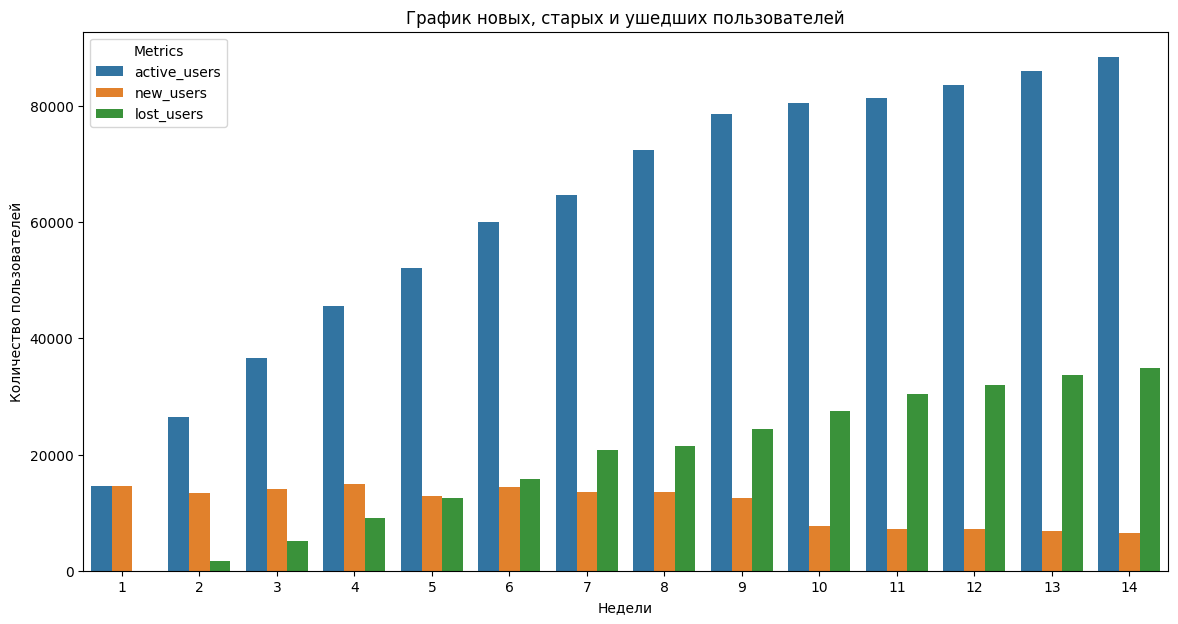

In [47]:
# Множественный столбчатый график
plt.figure(figsize=(14, 7))
sns.barplot(data=weekly_data.melt(id_vars='week'), x='week', y='value', hue='variable')
plt.title('График новых, старых и ушедших пользователей')
plt.xlabel('Недели')
plt.ylabel('Количество пользователей')
plt.legend(title='Metrics')
plt.show()


На графике видим рост количества активных пользователей. Также есть и рост количества ушедших пользователей в абсолютных цифрах.
